# Permutation and ANOVA

Recall that in the *'The idea of permutation'* page we used a permutation test to analyse the difference between the mean number of mosquitoes who flew at people who had just drank water, vs the mean number that flew at people who had just drank beer. 

In that example, we had one categorical predictor variable (`group`) and we analysed it's effect on a quantitative outcome variable: the mean number of activated mosquitoes (`activated`). Then, on the *'Permutation and the t-test'* page, we explored how this permutation test of a mean difference is an alternative to the traditional t-test for a mean difference.

However, the dataset we used contains more information than we looked at on those two pages. All of the participants (in both groups) were tested twice - once before they had drunk anything, and then again 15 minutes later after they had drunk either `beer` or `water`. 

Let's say we are interested in looking at the relationship between:
1) the mean number of activated mosquitoes (`activated`) <br>
2) the group a participant was in (`beer` or `water`) <br>
3) the time the participant was tested (`before` or `after` drinking). 

Let's say, specifically, we are interested in the effect of the two categorical variables (`group` and `test`) on the mean number of activated mosquitoes (`activated`). In this case we have two predictor variables:

* `group`, which has two levels:  `beer` or `water` (each participant is in one or the other, not both)
    
* `test`, which also has two levels: `before` and `after` (each participant is tested in both conditions)

Because each predictor has two levels we are now comparing four means instead of two:

* the mean of the `beer` group `before` drinking
* the mean of the `beer` group `after` drinking
* the mean of the `water` group `before` drinking
* the mean of the `water` group `after` drinking

For this situation - where we have more than one categorical predictor variable, and we are measuring the effect of the predictors on a quantitative outcome variable - we will need to use a permutation test version of ANOVA. ANOVA (which stands for 'analysis of variance') is similar to a t-test, but it let's us compare more than two means. 

Why would we want to compare more than two means? Because it let's us look for both *main effects* and *interaction effects*. Briefly, a main effect is the effect of one predictor variable on the outcome variable, irrespective of the effect of the other predictor(s). An interaction effect is the effect of one predictor on the outcome *as a function of the other predictor*. We will explain what this means in detail shortly. First, let's re-orient ourselves to the dataset.

As before, you can download the data from
{download}`mosquito_beer.csv <../data/mosquito_beer.csv>`.

See [this
page](https://github.com/matthew-brett/datasets/tree/master/mosquito_beer)
for more details on the dataset, and [the data license
page](../data/LICENSE).

Let's read in the data in the familiar way:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read in the data
df = pd.read_csv('https://raw.githubusercontent.com/matthew-brett/cfd2020/master/data/mosquito_beer.csv')

# dropping columns we don't need
df.drop(['no_odour','volunt_odour','co2no','co2od','temp','trapside','datetime'], axis = 1, inplace = True)

# show the first 5 rows
df.head()

,volunteer,group,test,nb_released,activated
0,subj1,beer,before,50,16
1,subj2,beer,before,50,33
2,subj3,beer,before,50,15
3,subj4,beer,before,50,10
4,subj5,beer,before,50,10


If you look at the dataframe above, you'll notice there is a column called `test`. This contains the information about when the test took place e.g. `before` or `after` the participant had drunk either `water` or `beer`:

In [2]:
# show the unique values in the 'test' column
df['test'].unique()

array(['before', 'after'], dtype=object)

Remember that all of the participants, in both groups, were tested `before` and `after` drinking. Which means that there are two rows in the dataframe for each subject:

In [3]:
# show the rows corresponding to subject 1 (who was in the beer group)
df[df['volunteer'] == 'subj1']

,volunteer,group,test,nb_released,activated
0,subj1,beer,before,50,16
43,subj1,beer,after,50,14


In [4]:
# show the rows corresponding to subject 26 (who was in the water group)
df[df['volunteer'] == 'subj26']

,volunteer,group,test,nb_released,activated
25,subj26,water,before,50,21
68,subj26,water,after,50,33


Just to note, in many other datasets each subject (or *observational unit* if we are dealing with cars, trees, countries etc.) is represented in only one row of the dataframe. This dataset, because we have two rows per subject, is an example of a *stacked* dataset. This is important to be aware of, so that we do not treat each row as representing a different subject (e.g. by thinking there are twice as many subjects as there actually are!).

# Main effects and interaction effects

As we mentioned earlier, by comparing more than two means, we can look for both *main effects* and *interaction effects*. 

A main effect is just the effect of one predictor variable on the outcome variable, irrespective of any other predictor variables. We have already investigated one of the main effects in this dataset - the difference in the mean of `activated` between the `beer` and `water` groups which we investigated on *'The idea of permutation'* page is an example of a main effect.

In pythonic terms, to calculate a main effect, we retrieve all the rows of the dataframe which correspond to one level of the predictor variable we are interested in. So in this example, we find all rows of `df` where `group == 'beer'` is true, as well as all the rows of `df` where where `group == 'water'` is true, and then we calculate the difference in the mean of `activated` between these two groups:

In [5]:
# creating a dataframe of just the beer group
beer = df[df['group'] == 'beer']

# creating a dataframe of just the water group
water = df[df['group'] == 'water']

# calculating the 'beer - water' difference, without considerting 'test'
beer['activated'].mean() - water['activated'].mean()

1.5355555555555576

We will refer to these means (e.g. the means of each group when we ignore `test`) as the *overall group means*. The difference between these overall group means is the *main effect of `group`*.

Notice that we ignore `test` when calculating this main effect. Each group dataframe contains both the `before` and `after` observations for that group:

In [6]:
# showing that the `beer` dataframe has all of the `before` and `after` observations for the `beer` group
# this command shows every 5th row of the dataframe
beer.iloc[::5,:]

,volunteer,group,test,nb_released,activated
0,subj1,beer,before,50,16
5,subj6,beer,before,50,30
10,subj11,beer,before,50,31
15,subj16,beer,before,50,12
20,subj21,beer,before,50,10
43,subj1,beer,after,50,14
48,subj6,beer,after,50,27
53,subj11,beer,after,50,22
58,subj16,beer,after,50,7
63,subj21,beer,after,50,30


We can show the main effect by plotting the mean of the `beer` group and the mean of the `water` group, as shown on the graph below. The black dashed line shows the difference between the overall group means. 

*Note: this is not the normal way we would plot the means, as the x axis location does not convey any information, but this depiction of the main effect will be useful in clarifying the interaction effect later on...*

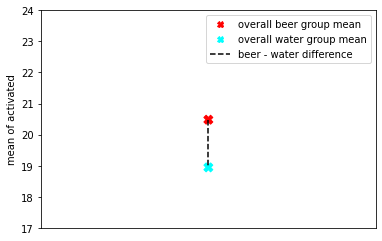

In [7]:
# HIDDEN CELL
plt.scatter(x = ['group mean', 'group mean'], 
            y = [df[df['group'] == 'beer']['activated'].mean(), df[df['group'] == 'water']['activated'].mean()], marker = 'X',
             s = 80,
            color = ['red', 'cyan'],)
plt.plot([], [], 'X', color = 'red', label = 'overall beer group mean')
plt.plot([], [], 'X', color = 'cyan', label = 'overall water group mean')
plt.plot(['group mean', 'group mean'], 
           [df[df['group'] == 'beer']['activated'].mean(), df[df['group'] == 'water']['activated'].mean()], '--', color = 'black', label = 'beer - water difference')
plt.ylim([17,24])
plt.xticks('')
plt.ylabel('mean of activated')
plt.legend();

An *interaction effect* is where the effect of one predictor variable depends on the level of the other predictor variable. So for example, consider if the mean number of activated mosquitoes was higher in the `beer` group than the `water` group `before` the subjects drank; but lower in the `beer` group than the `water` group `after` the subjects drank. In this hypothetical instance, the effect of `group` on `activated` depends upon the level of `test`. (There are several other patterns of interaction, other than the one just described, that could also occur).

To graphically look for interaction effects, it is useful to use an *interaction plot*. 

An interaction plot shows one predictor variable on the x-axis and shows the outcome variable on the y-axis. Coloured lines are used to show a third predictor variable. We will import our `interaction_plot` function from `statsmodels.graphics.factorplots`:

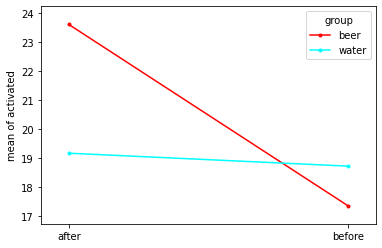

In [8]:
# importing the interaction_plot function from statsmodels
from statsmodels.graphics.factorplots import interaction_plot

# creating an interaction plot, the 'x = ' argument determines what will be on the x axis, the 'trace = ' argument determines
# what variable the lines will show, and the 'response = ' argument specifies the outcome variable (on the y axis)
interaction_plot(x = df['test'], trace = df['group'],  response = df['activated'])

# cleaning up the x axis slightly
plt.xlabel('');

The circular markers on the plot show the mean for each condition (e.g. the means for the `beer & after`, `beer & before`, `water & after` and `water & before` groups). 

If an interaction effect exists, then the difference between the means at the levels of one predictor changes as a function of the level of the other predictor. For this data, an interaction effect exists if the `beer - water` difference changes in the `before` condition vs the `after` condition. Another way of saying this is that the `beer - water` difference at each level of `test` *does not equal* the overall `beer - water` difference (the main effect).

The graph below shows the same interaction plot, but also the main effect of `group` (the overall mean `beer - water` difference which we calculated earlier), as well as the `beer - water` difference at each level of `test` (e.g. in the `before` condition and the `after` condition).

*Note: the position of the overall `beer - water` difference on the x axis is arbitrary, it is just there to allow visual comparison of the main effect to the `beer - water` difference in the `before` and `after` conditions...*

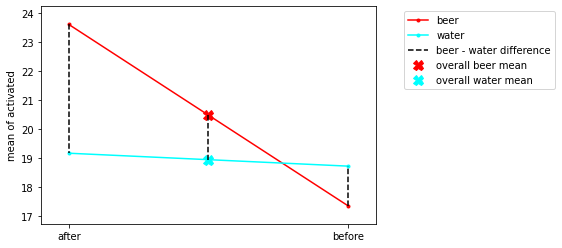

In [9]:
# HIDDEN CELL
interaction_plot(x = df['test'], trace = df['group'],  response = df['activated'])
plt.plot(['after', 'after'], [df[(df['group'] == 'beer') & (df['test'] == 'after')]['activated'].mean(), 
                              df[(df['group'] == 'water') & (df['test'] == 'after')]['activated'].mean()], '--', color = 'black')
plt.plot(['before', 'before'], [df[(df['group'] == 'beer') & (df['test'] == 'before')]['activated'].mean(),
                                df[(df['group'] == 'water') & (df['test'] == 'before')]['activated'].mean()], '--', color = 'black', label = 'beer - water difference')

plt.plot(0.5, df[df['group'] == 'beer']['activated'].mean(), 'X', color = 'red', markersize = 10,
         label = 'overall beer mean')
plt.plot(0.5, df[df['group'] == 'water']['activated'].mean(), 'X', color = 'cyan', markersize = 10,
         label = 'overall water mean')
plt.plot([0.5, 0.5], [df[df['group'] == 'beer']['activated'].mean(), df[df['group'] == 'water']['activated'].mean()], '--', color = 'black')
plt.xlabel('')
plt.legend(bbox_to_anchor = (1.55,1));

If there were no interaction, then all of the dashed black lines (showing the `beer - water` difference) should be equal in length. This would mean that `test` makes no difference to the effect of `group`. The `beer - water` difference would be the same at each level of `test`, and would be the same as the overall `beer - water` difference.

However, it looks as though the `beer - water` difference in the `after` condition is much larger than the `beer - water` difference in the `before` condition, and larger than the overall `beer - water` difference. This does provide graphical evidence for an interaction effect between `group` and `test`. 

Additionally, the graph shows that the mean number of activated mosquitoes was *lower* in the `beer` than the `water` group `before` the participants drank anything. However, the the mean number of activated mosquitoes was *higher* in the `beer` group than in the `water` group `after` the participants had drank.

Essentially, it looks like the direction of the effect of `group` reversed after the participants drank. This type of interaction is called a *qualitative interaction* - where the direction of the effect of one predictor variable *reverses* depending on the level of another predictor variable. Wherever you see *crossing* lines on an interaction plot, this provides graphical evidence for a qualitative interaction between the predictor variables.

For comparison, it is useful to think about how the data would look if there was no interaction effect. For instance, if there was main effect of `group`, but no interaction effect between `group` and `test`, then the plot would look something like this:

*NB: the following graph is made with fake data, for illustration only. It is not plotted from the actual data. All graphs on this page which use simulated data will use a 'green' and 'orange' color scheme*

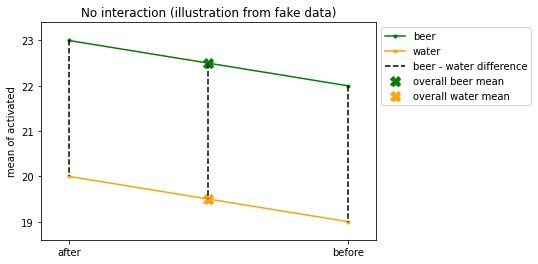

In [10]:
# HIDDEN CELL

before_beer = 22
before_water = 19
after_beer  = 23
after_water = 20

fake_1 = pd.DataFrame({'test': ['before', 'before', 'after', 'after'],
                      'group': ['beer', 'water', 'beer', 'water'],
                       'activated': [before_beer, before_water , after_beer, after_water]})

interaction_plot(x = fake_1['test'], trace = fake_1['group'],  response = fake_1['activated'],colors = ['green', 'orange'])
plt.title('No interaction (illustration from fake data)')
plt.plot(['after', 'after'], [after_beer, after_water], '--', color = 'black')
plt.plot(['before', 'before'], [before_beer, before_water], '--', color = 'black', label = 'beer - water difference')
plt.plot(0.5, (after_beer+before_beer)/2, 'X', color = 'green', markersize = 10,
         label = 'overall beer mean')
plt.plot(0.5, (after_water+before_water)/2, 'X', color = 'orange', markersize = 10,
         label = 'overall water mean')
plt.xlabel('')
plt.plot([0.5, 0.5], [(after_beer+before_beer)/2, (after_water+before_water)/2], '--', color = 'black')
plt.legend(bbox_to_anchor = (1,1));

In this 'no interaction' illustration, the `beer - water` difference is the same at each level of `test`. The effect of `group` at each level of `test` *is the same as the main effect of `group`* (the difference between the overall group means). Thus, `group` and `test` do not interact. If it is the case that there is no interaction effect, then the lines on the interaction plot will be parallel.

Lets compare this *no interaction* illustration to the interaction effect in the actual data:

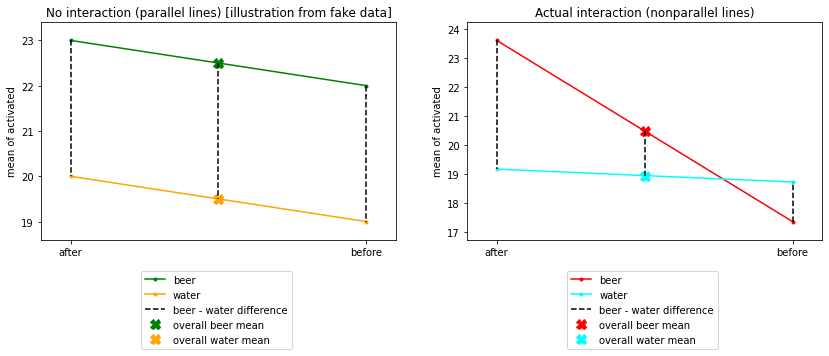

In [11]:
# HIDDEN CELL
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,4))
interaction_plot(x = fake_1['test'], trace = fake_1['group'],  response = fake_1['activated'],
                 colors = ['green', 'orange'], ax = ax1)
ax1.set_title('No interaction (parallel lines) [illustration from fake data]')
ax1.plot(['after', 'after'], [after_beer, after_water], '--', color = 'black')
ax1.plot(['before', 'before'], [before_beer, before_water], '--', color = 'black', label = 'beer - water difference')
ax1.plot(0.5, (after_beer+before_beer)/2, 'X', color = 'green', markersize = 10,
         label = 'overall beer mean')
ax1.plot(0.5, (after_water+before_water)/2, 'X', color = 'orange', markersize = 10,
         label = 'overall water mean')
ax1.set_xlabel('')
ax1.plot([0.5, 0.5], [(after_beer+before_beer)/2, (after_water+before_water)/2], '--', color = 'black')
ax1.legend(bbox_to_anchor = (0.72, -0.12))


interaction_plot(x = df['test'], trace = df['group'],  response = df['activated'],
                ax = ax2)
ax2.plot(['after', 'after'], [df[(df['group'] == 'beer') & (df['test'] == 'after')]['activated'].mean(), 
                              df[(df['group'] == 'water') & (df['test'] == 'after')]['activated'].mean()], '--', color = 'black')
ax2.plot(['before', 'before'], [df[(df['group'] == 'beer') & (df['test'] == 'before')]['activated'].mean(),
                                df[(df['group'] == 'water') & (df['test'] == 'before')]['activated'].mean()], '--', color = 'black', label = 'beer - water difference')

ax2.plot(0.5, df[df['group'] == 'beer']['activated'].mean(), 'X', color = 'red', markersize = 10,
         label = 'overall beer mean')
ax2.plot(0.5, df[df['group'] == 'water']['activated'].mean(), 'X', color = 'cyan', markersize = 10,
         label = 'overall water mean')
ax2.plot([0.5, 0.5], [df[df['group'] == 'beer']['activated'].mean(), df[df['group'] == 'water']['activated'].mean()], '--', color = 'black')
ax2.set_xlabel('')
ax2.set_title('Actual interaction (nonparallel lines)')
ax2.legend(bbox_to_anchor = (0.72,- 0.12));

We can see in the 'no interaction' graph on the left that the `beer - water` difference is not affected by the level of `test`. It is the same in both the `before` condition and the `after` condition e.g. the length of the dashed black lines is equal. Knowledge about the level of `test` does not tell us anything about the effect of the `group`. For this simulated data, `group` and `test` are *independent* and *do not interact*.

In the graph on the right, from the actual data, the *magnitude and the direction* of the `beer - water` difference changes as a function of `test`. The mean of the beer group is higher in the `after` condition, and the mean of the `water` group is higher in the `before` condition. This distance between the means is not equal in the two conditions e.g. the length of the dashed black lines is not equal. The `beer - water` difference in the `after` condition and in the `before` condition also looks different to the overall `beer - water` difference. This all provides graphical evidence that `group` and `test` are *dependent* and *do interact*.

# The interaction value

In order to perform a permutation test on this interaction, we need a statistic which summarizes the pattern of the interaction. E.g. we need a single value that tells us whether the effect of one predictor is the same (or not) at each level of the other predictor.

To see how we get such a number, look again at the simulated *'no interaction'* graph above (on the left hand side of the two graphs which are next to one another). Because the `beer - water` difference is the same at each level of `test`, e.g. in the `before` condition and the `after` condition, then if we subtract the `beer - water` difference in one of the `test` conditions from the `beer - water` difference in the other condition, the result of this subtraction should be (close to) 0. 

Look at the dashed black line in the `after` condition of the *'no interaction'* graph. If you look at the y-axis values, you can see that the length of this line is 3. If you look at the dashed black line in the `before` condition on the same graph, you can see that the length of this line is also 3. If we subtract 3 from 3, we get 0. 

If you look at the interaction plot from the actual data (on the right hand side above), you can see that if we performed the same subtraction, the result would <b>not</b> be zero. The y-axis length of the dashed black line in the `after` condition looks like it has a length of approximately 4. The y-axis length of the dashed black line in the `before` condition looks like it has a length of approximately 1. If we subtract 4 from 1 (or vice versa) the result will be nonzero.

This is how we get our interaction value. We subtract the mean difference in one condition from the mean difference in the other condition. If there is no interaction, then the result of this subtraction should be close to 0. If there is an interaction, the result should be nonzero (the further from 0 it is, the greater the interaction). Thus, whether the result of this subtraction is nonzero or not gives us information about the pattern displayed on the interaction plots above e.g. whether the effect of `group` changes as a function of `test`.

Let's calculate the interaction value from the actual data. First we will need to create dataframes containing the `beer` and `water` groups for each of the levels of `test`:

In [12]:
# a dataframe containing just the 'before' observations for the 'beer' group
beer_before = beer[beer['test'] == 'before']

# a dataframe containing just the 'after' observations for the 'beer' group
beer_after = beer[beer['test'] == 'after']

# a dataframe containing just the 'before' observations for the 'water' group
water_before = water[water['test'] == 'before']

# a dataframe containing just the 'after' observations for the 'water' group
water_after = water[water['test'] == 'after']

Next, we will need to calculate the mean difference between the `beer` and `water` groups at each level of `test` (e.g. in the `before` condition and in the `after` condition):

In [13]:
# the 'beer - water' difference in the 'before' condition
before_diff =  beer_before['activated'].mean() -  water_before['activated'].mean()

# the 'beer - water' difference in the 'after' condition
after_diff = beer_after['activated'].mean() - water_after['activated'].mean() 

print('The "beer - water" mean difference in the "before" condition =', before_diff)

print('The "beer - water" mean difference in the "after" condition =', after_diff)

The "beer - water" mean difference in the "before" condition = -1.362222222222222
The "beer - water" mean difference in the "after" condition = 4.433333333333334


These differences correspond to the dashed black lines on the interaction plot (read the values on the y-axis to check that this is correct):

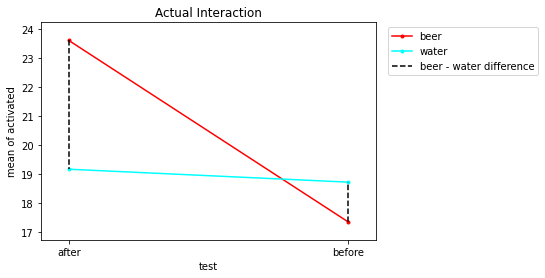

In [14]:
# do not worry about this code, it just generates the plot below
interaction_plot(x = df['test'], trace = df['group'],  response = df['activated'])

plt.plot(['after', 'after'], [df[(df['group'] == 'beer') & (df['test'] == 'after')]['activated'].mean(), 
                              df[(df['group'] == 'water') & (df['test'] == 'after')]['activated'].mean()], '--', color = 'black')
plt.plot(['before', 'before'], [df[(df['group'] == 'beer') & (df['test'] == 'before')]['activated'].mean(),
                                df[(df['group'] == 'water') & (df['test'] == 'before')]['activated'].mean()], '--', color = 'black', label = 'beer - water difference')
plt.legend(bbox_to_anchor = (1.5,1))
plt.title('Actual Interaction')
plt.show()

Now, to get a single number which contains information about the interaction, we subtract the `beer - water` difference in the `before` condition from the `beer - water` difference in the `after` condition:

In [15]:
# calculating the interaction value
interaction =  after_diff - before_diff

interaction

5.795555555555556

# Permutation testing the interaction effect

So our interaction value is nonzero. But is it significantly different from zero, so as to convince us that it is a real effect? Is it possible that this is a fluke result - e.g. one where the pattern of interaction we observe in this sample is different to the one we would observe in the population of all water/beer drinkers?

If all we were interested in were the main effects - e.g. the effect of `group` without considering `test`, or vice versa - then we could just shuffle the `activated` values, and perform a permutation test as we did on the *'The idea of permutation'* page.

However, this will not work for testing an interaction effect. Essentially, if we shuffle the `activated` scores, we are testing the null hypothesis that *there is no association between any of the predictors and the outcome variable*. 

This is not the null hypothesis we want to test when we test for an interaction effect. We want to test the null hypothesis that the *effect of one predictor is the same at all levels of the other predictor*.  Or equivalently that the *effect of one predictor, at all levels of the other predictor, is equal to the main effect of the first predictor*. 

In order to test the correct null hypothesis, we shuffle the scores for one of the predictors only, within each level of the other predictor variable. In this case, we will shuffle the `before` and `after` labels, within the `beer` group, and then *separately* shuffle the `before` and `after` labels in the `water` group.

This approach works, because we only want to randomize *how the variables* interact, rather than randomizing the main effects of both predictors (which is what would happen if we shuffled all the `activated` scores, as we did on *'The idea of permutation'* page). In this case, we will keep the main effect of `group` the same, whilst randomizing the *interactive* relationship between `test` and `group`. 

In the permutation test, we repeat the shuffling process thousands of times. This will allow us to build a sampling distribution of interaction values *from a simulated world where the interaction between the predictors is random*.

Before we do the permuation test, let's look at each step of the process. First, let's create copies of the data, to avoid overwriting the original data when during the shuffling process:

In [16]:
# creating copies of the data, to avoid overwriting the original data when shuffling
beer_copy = beer.copy()

water_copy = water.copy()

Now, let's just remind ourselves what `np.random.permutation()` does:

In [17]:
# show the unshuffled `test` values for the `beer` group
print('Original data:')
display(beer_copy['test'].values)

Original data:


array(['before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'after', 'after', 'after', 'after', 'after', 'after',
       'after', 'after', 'after', 'after', 'after', 'after', 'after',
       'after', 'after', 'after', 'after', 'after', 'after', 'after',
       'after', 'after', 'after', 'after', 'after'], dtype=object)

In [18]:
# show the shuffled `test` values for the `beer` group (re-run this cell to see the shuffling in action)
print('Shuffled data:')
display(np.random.permutation(beer_copy['test'] ))

Shuffled data:


array(['before', 'before', 'before', 'after', 'before', 'after', 'before',
       'after', 'after', 'before', 'after', 'after', 'after', 'after',
       'after', 'after', 'before', 'after', 'after', 'after', 'before',
       'before', 'after', 'before', 'after', 'before', 'before', 'after',
       'before', 'before', 'after', 'before', 'before', 'before',
       'before', 'after', 'after', 'after', 'before', 'after', 'after',
       'before', 'before', 'before', 'before', 'after', 'before',
       'before', 'after', 'after'], dtype=object)

Now, let's calculate the fake interaction effect for the shuffled data, and look at the effect the shuffling has on the interaction plot. Re-run this cell below a few times to see the effect of the shuffling over multiple iterations:

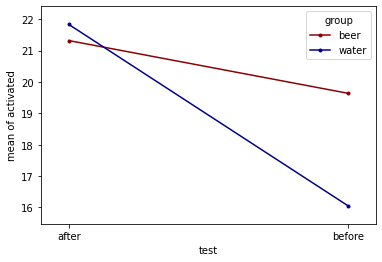

The fake interaction value =  -4.097777777777775


In [19]:
# shuffling the 'test' labels in the 'beer' group
beer_copy['test'] = np.random.permutation(beer_copy['test'] )

# shuffling the 'test' labels in the 'water' group
water_copy['test'] = np.random.permutation(water_copy['test'] )

# a dataframe containing just the fake 'before' observations for the 'beer' group
fake_beer_before = beer_copy[beer_copy['test'] == 'before']

# a dataframe containing just the fake 'after' observations for the 'beer' group
fake_beer_after = beer_copy[beer_copy['test'] == 'after']

# a dataframe containing just the fake 'before' observations for the 'water' group
fake_water_before = water_copy[water_copy['test'] == 'before']

# a dataframe containing just the fake 'after' observations for the 'water' group
fake_water_after = water_copy[water_copy['test'] == 'after']

# the 'beer - water' difference in the 'before' condition
fake_before_diff =  fake_beer_before['activated'].mean() -  fake_water_before['activated'].mean()

# the 'beer - water' difference in the 'after' condition
fake_after_diff = fake_beer_after['activated'].mean() - fake_water_after['activated'].mean() 

# calculating the fake interaction value
fake_interaction =  fake_after_diff - fake_before_diff

# creating a dataframe to store the shuffled data
df_shuffled = beer_copy.append(water_copy)
    
# creating an interaction plot of the shuffled data
interaction_plot(x = df_shuffled['test'], trace = df_shuffled['group'],  response = df_shuffled['activated'],
                      colors = ['darkred', 'darkblue'])
plt.show()

# showing the fake interaction value
print('The fake interaction value = ', fake_interaction)

In the permutation test, we will repeat this process a large number of times, and store the simulated interaction values. 

It may not be obvious from the interaction plot above, but in this shuffling process we are randomizing the interaction effect, whilst holding the main effect of `group` constant. This let's us test the null hypothesis that the *effect of `group` is the same at all levels of `test`*, which is the null hypothesis we want to test to see if the interaction is significant. If we did not hold `group` constant (e.g. we shuffled the `beer` and `water` labels as well), then, as mentioned previously, we would be testing a different null hypothesis (e.g. that there was no association between either of the predictors and `activated`). 

This may be a bit confusing at first, but hopefully it will become clearer through illustration. Let's convince ourselves that if we shuffle the `test` labels separately for the `beer` and `water` groups, then the overall `beer - water` difference will remain unchanged.

First, let's look at the interaction plot from the actual data, which also shows the main effect of `group` (the difference between the two large X's showing the overall means):

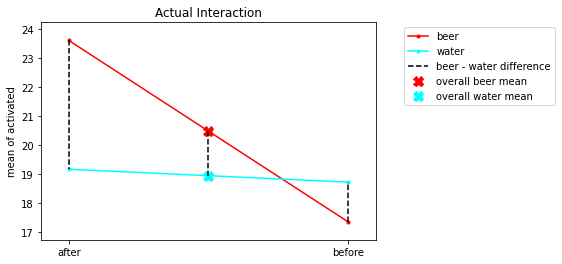

In [20]:
# HIDDEN CELL
interaction_plot(x = df['test'], trace = df['group'],  response = df['activated'])
plt.plot(['after', 'after'], [df[(df['group'] == 'beer') & (df['test'] == 'after')]['activated'].mean(), 
                              df[(df['group'] == 'water') & (df['test'] == 'after')]['activated'].mean()], '--', color = 'black')
plt.plot(['before', 'before'], [df[(df['group'] == 'beer') & (df['test'] == 'before')]['activated'].mean(),
                                df[(df['group'] == 'water') & (df['test'] == 'before')]['activated'].mean()], '--', color = 'black', label = 'beer - water difference')

plt.plot(0.5, df[df['group'] == 'beer']['activated'].mean(), 'X', color = 'red', markersize = 10,
         label = 'overall beer mean')
plt.plot(0.5, df[df['group'] == 'water']['activated'].mean(), 'X', color = 'cyan', markersize = 10,
         label = 'overall water mean')
plt.plot([0.5, 0.5], [df[df['group'] == 'beer']['activated'].mean(), df[df['group'] == 'water']['activated'].mean()], '--', color = 'black')
plt.legend(bbox_to_anchor = (1.55,1))
plt.xlabel('')
plt.title('Actual Interaction');

The graphs below show several iterations of the shuffling process we went through above - where we shuffled the `before` and `after` labels, within the `beer` group, and then *separately* shuffled the `before` and `after` labels in the `water` group:

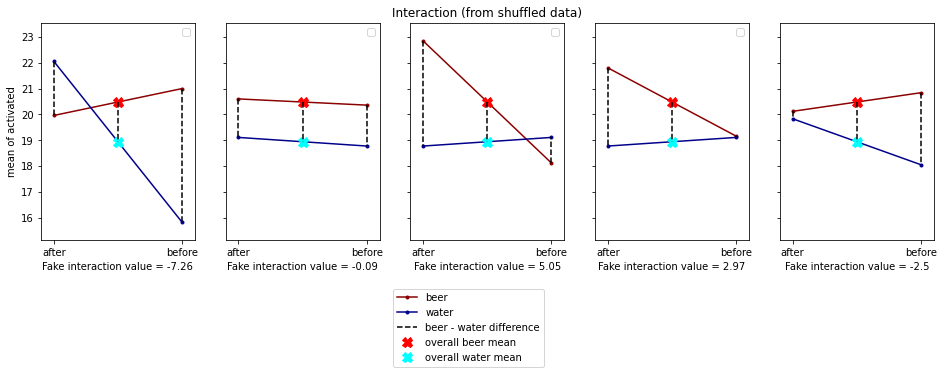

In [21]:
# HIDDEN CELL

# ensuring the same plots each time (which all display correctly within the limits of the y-axis)
np.random.seed(151)

# creating subplots
fig, ax = plt.subplots(nrows =1, ncols=5, figsize = (16, 4), sharey = True)

# looping through subplots, shuffing the data within each group, plotting the interaction in the shuffled data, alongside
# the main effect
for i in np.arange(len(ax)):
  
    df_copy = df.copy()

    beer_copy = beer.copy()

    water_copy = water.copy()

    # shuffling the 'test' labels in the 'beer' group
    beer_copy['test'] = np.random.permutation(beer_copy['test'] )

    # shuffling the 'test' labels in the 'water' group
    water_copy['test'] = np.random.permutation(water_copy['test'] )
    
    # a dataframe containing just the fake 'before' observations for the 'beer' group
    fake_beer_before = beer_copy[beer_copy['test'] == 'before']

    # a dataframe containing just the fake 'after' observations for the 'beer' group
    fake_beer_after = beer_copy[beer_copy['test'] == 'after']

    # a dataframe containing just the fake 'before' observations for the 'water' group
    fake_water_before = water_copy[water_copy['test'] == 'before']

    # a dataframe containing just the fake 'after' observations for the 'water' group
    fake_water_after = water_copy[water_copy['test'] == 'after']

    # the 'beer - water' difference in the 'before' condition
    fake_before_diff =  fake_beer_before['activated'].mean() -  fake_water_before['activated'].mean()

    # the 'beer - water' difference in the 'after' condition
    fake_after_diff = fake_beer_after['activated'].mean() - fake_water_after['activated'].mean() 

    # calculating the fake interaction value
    fake_interaction =  fake_after_diff - fake_before_diff

    df_shuffled = beer_copy.append(water_copy)
    
    interaction_plot(x = df_shuffled['test'], trace = df_shuffled['group'],  response = df_shuffled['activated'],
                      colors = ['darkred', 'darkblue'], ax = ax[i])
    ax[i].plot(['after', 'after'], [beer_copy[beer_copy['test'] == 'after']['activated'].mean(), 
                                    water_copy[water_copy['test'] == 'after']['activated'].mean()], '--', color = 'black')
    ax[i].plot(['before', 'before'], [beer_copy[beer_copy['test'] == 'before']['activated'].mean(), 
                                    water_copy[water_copy['test'] == 'before']['activated'].mean()], '--', color = 'black', label = 'beer - water difference')

    ax[i].plot(0.5, beer_copy['activated'].mean(), 'X', color = 'red', markersize = 10,
               label = 'overall beer mean')
    ax[i].plot(0.5, water_copy['activated'].mean(), 'X', color = 'cyan', markersize = 10,
               label = 'overall water mean')
    ax[i].plot([0.5, 0.5],  [beer_copy['activated'].mean(), water_copy['activated'].mean()], '--', color = 'black')
    
    # removing clutter
    ax[i].legend('')
    
    ax[i].set_xlabel('Fake interaction value = '+str(np.round(fake_interaction,2)))
    
    if i != 0:
        
        ax[i].set_ylabel('')
        
    
# setting title and adjusting legend location
ax[2].set_title('Interaction (from shuffled data)')
plt.legend(bbox_to_anchor = (-1.5,-0.2))
plt.show()

Hopefully, the above graphs should make it clear that we are randomizing the *interaction effect*, whilst holding constant the main effect of `group`. To convince yourself of this, look at the difference between the two large X's (depicting the main effect of `group`). This difference is the same on each graph, whereas the interaction effect changes due to the shuffling (the fake interaction value is shown below the x-axis of each graph).

Now, let's perform the actul permutation test (read each line carefully to ensure you understand what it is doing):

In [22]:
# setting the number of iterations
n_iters = 10000

# making an array to store the fake interaction values
fake_interactions = np.zeros(n_iters)

for i in np.arange(n_iters):
    
    # adding a progress counter, (do not worry about this! it's just to give an indication of much time we have to make a
    # coffee as we wait for the simulation to complete...)
    if (i/n_iters * 100)%20 == 0:
      
        print(i/n_iters * 100, '% complete')

    # creating a separate dataframe containing only the 'beer' group
    fake_beer = df[df['group'] == 'beer'].copy()
    
    # shuffling the 'test' scores for the fake 'beer' group
    fake_beer['test_shuffled'] = np.random.permutation(fake_beer['test'])
    
    # creating a separate dataframe containing only the 'water' group
    fake_water = df[df['group'] == 'water'].copy()
    
    # shuffling the 'test' scores for the fake 'water' group
    fake_water['test_shuffled'] = np.random.permutation(fake_water['test'])
    
    # creating a dataframe for the fake beer_before group
    fake_beer_before = fake_beer[fake_beer['test_shuffled'] == 'before']
    
    # creating a dataframe for the fake water_before group
    fake_water_before = fake_water[fake_water['test_shuffled'] == 'before']
    
    # creating a dataframe for the fake beer_after group
    fake_beer_after = fake_beer[fake_beer['test_shuffled'] == 'after']
    
    # creating a dataframe for the fake water_after group
    fake_water_after = fake_water[fake_water['test_shuffled'] == 'after']
    
    # calculating the fake interaction effect
    fake_interaction = (fake_beer_after['activated'].mean() - fake_water_after['activated'].mean()) - (fake_beer_before['activated'].mean() - fake_water_before['activated'].mean())
    
    # storing the result in the fake interactions array
    fake_interactions[i] = fake_interaction

    
print((i+1)/n_iters * 100, '% complete')

0.0 % complete
20.0 % complete
40.0 % complete
60.0 % complete
80.0 % complete
100.0 % complete


Let's graphically inspect the results of permutation test, by plotting the actual interaction value (shown in orange) against the distribution of simulated interaction values:

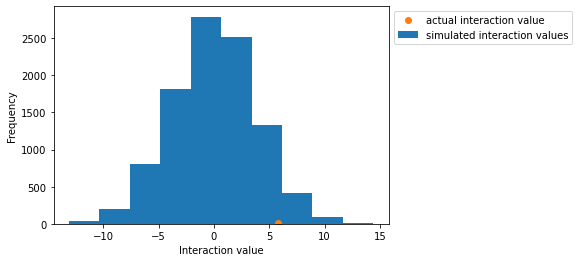

In [23]:
# plot a histogram of the simulation results
plt.hist(fake_interactions, label = 'simulated interaction values')

# adding axes labels
plt.xlabel('Interaction value')
plt.ylabel('Frequency')

# plot the original interaction value
plt.plot(interaction, 10,  'o', label = 'actual interaction value')

# show the legend
plt.legend(bbox_to_anchor = (1,1));

Notice that the distribution of fake interaction values is centered around 0. We have simulated a 'null world' where the interaction between `test` and `group` is random. Our permutation test is answering the question *'how different does an interaction have to be from 0 for us to be confident that it is not a fluke - i.e. that there genuinely is an interaction effect in the total population of beer/water drinkers? And is our actual interaction value large enough to be convince us that a difference probably exists in the population?'*

We can calculate a p-value for the interaction effect by calculating the proportion of the simulated values that are at least as large as the actual simulated value:

In [24]:
# calculate a p-value
np.count_nonzero(fake_interactions >= interaction)/len(fake_interactions)

0.0626

If we take the conventional 0.05 significance level, we should conclude that the interaction effect in this data is not significant. It is not different *enough* from 0 for us to be confident that it comes from a population with a nonzero interaction value.

# Summary
This tutorial has shown you how to use a permutation test to test for a significant interaction between two categorical predictor variables and a quantitative outcome variable.